In [43]:
library(ggplot2)
library(gprofiler2)
library(RColorBrewer)

In [2]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv"
df_clusters = read.csv(filename, row.names = 1)

In [3]:
head(df_clusters[,c("label","gene")],2)

,label,gene
0,2,ABHD10_-3_111697439_T_G
1,9,ABHD12B_-14_51328222_C_T


In [5]:
###################################################### 
### approach 1: enrichment of genes (eQTL) in the clusters

In [6]:
## load individual eQTL genetic effects
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
colnames(df) = gsub("\\.","-",colnames(df))
head(df,2)
nrow(df)

,ABHD10_-3_111697439_T_G,ABHD12B_-14_51328222_C_T,ACKR2_-3_42817129_C_T,ADD2_-2_70894426_A_T,ADSL_-22_40757228_A_C,AIM1L_-1_26673825_C_T,AKAP7_-6_131691964_C_A,ALDH7A1_-5_126011412_G_A,ANKRD18B_-9_33524775_C_A,APIP_-11_34905987_T_C,...,YWHAE_-17_1246420_G_A,ZBBX_-3_167080934_T_G,ZC3HAV1_-7_138730361_T_C,ZFR2_-19_3840157_C_T,ZG16B_-16_2871121_T_C,ZNF423_-16_49599995_C_G,ZNF552_-19_58315273_G_A,ZNF738_-19_21474173_G_A,ZNF77_-19_2936535_G_A,ZP3_-7_76177284_C_T
HPSI0714i-iudw_1--DA--d30--0,-0.2108622,0.003924475,0.02206444,0.02834211,0.2235163,-0.03575032,-0.09473256,0.006901295,0.0006737957,-0.07499119,...,0.06962421,0.1120253,-0.04172133,0.01126897,0.1057579,-0.03101814,0.0909417,0.3020245,-0.1583842,-0.05596878
HPSI0714i-iudw_1--DA--d30--1,-0.2283969,-0.047217741,0.10596178,0.02514689,-0.1921801,-0.01471768,0.01878961,-0.171038975,-0.1105473675,-0.18686595,...,-0.21070417,0.3759854,0.08774666,0.02505916,-0.1950055,-0.22780547,0.0775938,0.3452492,-0.3472152,-0.15259400


[1] 8352

In [9]:
labels = unique(df_clusters$label)
labels

[1]  2  9  6 10  8 11  0  7  3  1  4  5

In [ ]:
#### unordered

In [32]:
df_list = list()
for (i in 1:length(labels)){
    label = labels[i]
    gene_list = as.character(df_clusters[df_clusters$label == label,"gene"])
    genes = gsub("_-.*","",gene_list)
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = FALSE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [36]:
df_list[[2]]

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,TRUE,0.04967062,2,2,1,0.50000000,0.5000000000,CORUM:7266,CORUM,AKT1-NQO2 complex,3627,2731,CORUM:0000000
query_1,FALSE,0.07449565,3,2,1,0.50000000,0.3333333333,CORUM:6287,CORUM,SLC2A1-DMTN-ADD2 complex,3627,2029,CORUM:0000000
query_1,FALSE,1.00000000,3627,2,2,1.00000000,0.0005514199,CORUM:0000000,CORUM,CORUM root,3627,1,
query_1,FALSE,1.00000000,353,21,1,0.04761905,0.0028328612,GO:0071496,GO:BP,cellular response to external stimulus,18123,19573,GO:0009605
query_1,FALSE,1.00000000,1467,21,3,0.14285714,0.0020449898,GO:0071495,GO:BP,cellular response to endogenous stimulus,18123,19572,GO:0009719
query_1,FALSE,1.00000000,121,21,1,0.04761905,0.0082644628,GO:0071466,GO:BP,cellular response to xenobiotic stimulus,18123,19543,"GO:0009410, GO:0070887"
query_1,FALSE,1.00000000,671,21,2,0.09523810,0.0029806259,GO:0071417,GO:BP,cellular response to organonitrogen compound,18123,19502,"GO:0010243, GO:0071310, GO:0071495, GO:1901699"
query_1,FALSE,1.00000000,624,21,1,0.04761905,0.0016025641,GO:0071407,GO:BP,cellular response to organic cyclic compound,18123,19492,"GO:0014070, GO:0071310"
query_1,FALSE,1.00000000,617,21,1,0.04761905,0.0016207455,GO:0071396,GO:BP,cellular response to lipid,18123,19481,"GO:0033993, GO:0071310"
query_1,FALSE,1.00000000,245,21,1,0.04761905,0.0040816327,GO:0071383,GO:BP,cellular response to steroid hormone stimulus,18123,19468,"GO:0032870, GO:0048545, GO:0071396, GO:0071407"


In [45]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05,]
#     print(nrow(df_curr))
    n = min(20, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

In [46]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",labels[i])
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

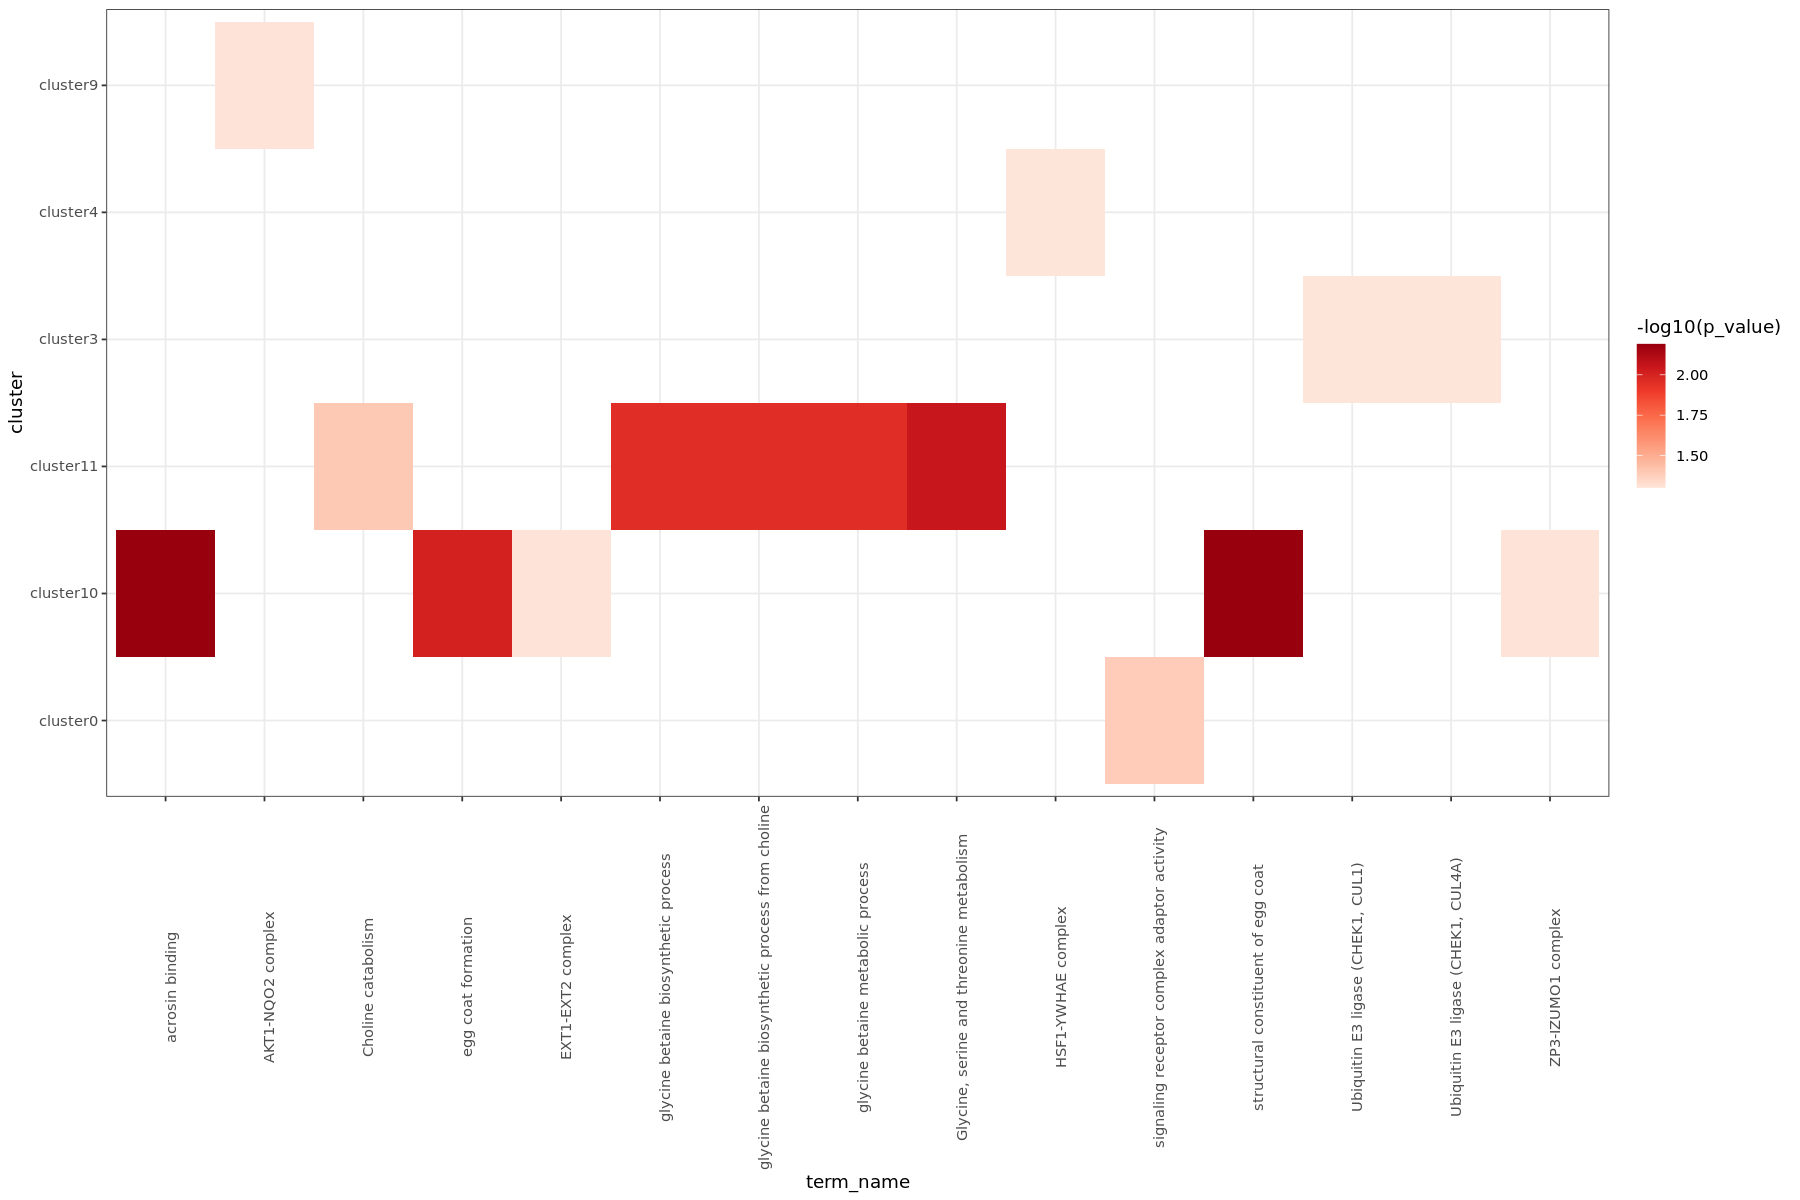

In [47]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [48]:
# order by beta

In [58]:
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/MOFA10/eqtl_est_single_GxE_genetic_effects.csv", row.names=1)

In [59]:
head(df_beta)

,beta,eqtl
0,0.7559366,ABHD10_-3_111697439_T_G
1,0.3794608,ABHD12B_-14_51328222_C_T
2,0.2242704,ACKR2_-3_42817129_C_T
3,0.2317751,ADD2_-2_70894426_A_T
4,0.4976565,ADSL_-22_40757228_A_C
5,0.1462157,AIM1L_-1_26673825_C_T


In [60]:
library(dplyr)
df_beta$gene = df_beta$eqtl
df0 = inner_join(df_clusters,df_beta)
nrow(df_clusters)
nrow(df_beta)
nrow(df0)

Joining, by = "gene"


[1] 212

[1] 213

[1] 212

In [61]:
df0 = df0[order(df0$beta, decreasing = T),]
head(df0)

,label,gene,pp0,pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,beta,eqtl
78,9,HLA.DRB5_-6_32551716_C_G,0,0,0,0,0,0,0,0,0,1,0,0,2.399403,HLA.DRB5_-6_32551716_C_G
47,3,CRYBB2_-22_25845855_C_G,0,0,0,1,0,0,0,0,0,0,0,0,1.776345,CRYBB2_-22_25845855_C_G
164,10,SLC44A2_-19_10813795_A_G,0,0,0,0,0,0,0,0,0,0,1,0,1.443384,SLC44A2_-19_10813795_A_G
61,11,EPCAM_-2_47590762_C_T,0,0,0,0,0,0,0,0,0,0,0,1,1.427423,EPCAM_-2_47590762_C_T
42,7,CNOT6L_-4_78754433_T_C,0,0,0,0,0,0,0,1,0,0,0,0,1.310351,CNOT6L_-4_78754433_T_C
66,11,FAM153B_-5_175511318_C_T,0,0,0,0,0,0,0,0,0,0,0,1,1.262619,FAM153B_-5_175511318_C_T


In [70]:
df_list0 = list()
for (i in 1:length(labels)){
    label = labels[i]
    gene_list = as.character(df0[df0$label == label,"beta"])
    names(gene_list) = as.character(df0[df0$label == label,"gene"])
    genes = gsub("_-.*","",names(gene_list))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list0[[i]] = as.data.frame(gres$result)
}

In [71]:
pats0 = c()
for (i in 1:length(df_list0)){
    if (is.null(df_list0[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/11,]
#     print(nrow(df_curr))
    n = min(30, nrow(df_curr))
    pats0 = c(pats0, unique(df_curr[1:n,"term_name"]))
}

In [72]:
df_to_plot0 = data.frame()
for (i in 1:length(df_list0)){
    cluster = paste0("cluster",labels[i])
    df_curr = df_list0[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot0 = rbind(df_to_plot0, df_curr[df_curr$term_name %in% pats0,
                                           c("p_value","cluster","term_name","term_id")])
}

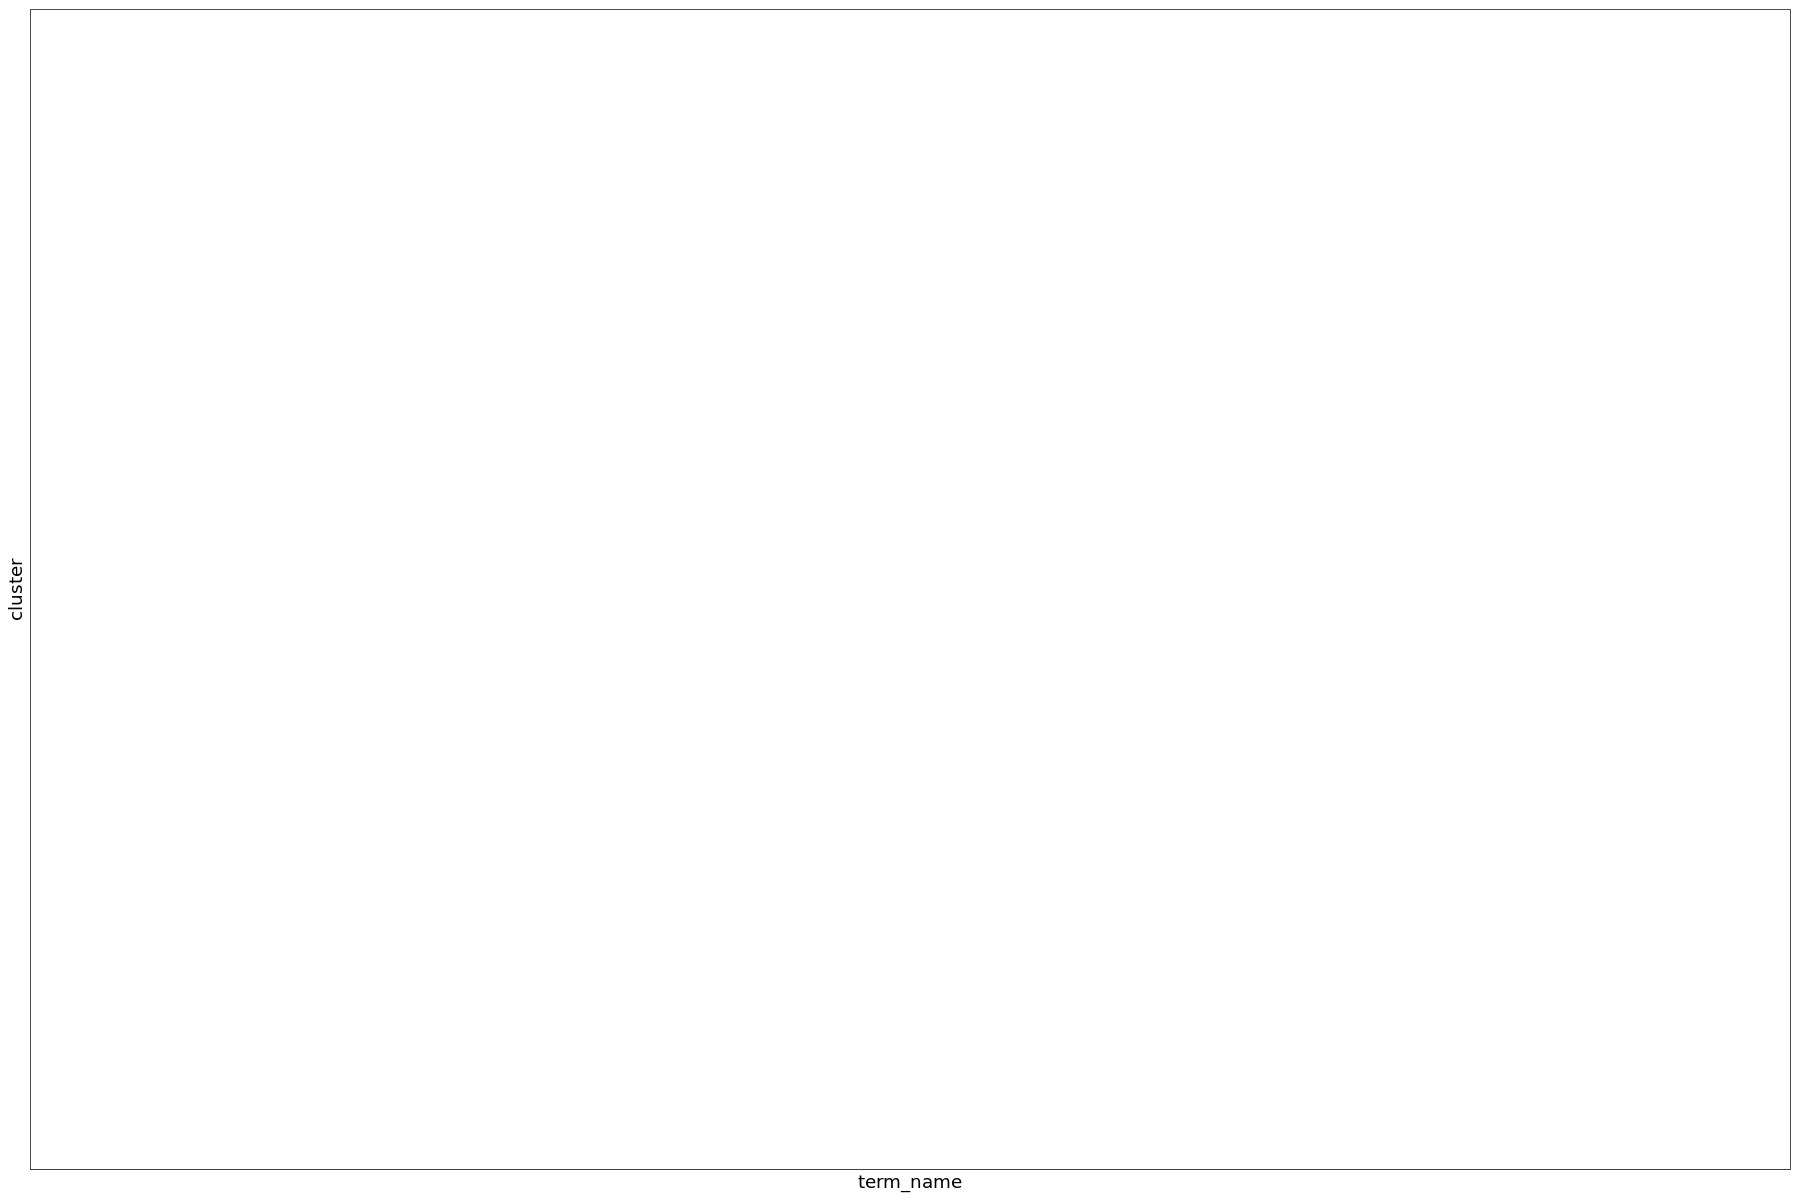

In [73]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot0, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [66]:
gres

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,FALSE,0.09941798,2,2,1,0.5,0.5000000000,GO:0043007,GO:BP,maintenance of rDNA,18123,12126,GO:0043570
query_1,FALSE,0.27340699,11,1,1,1.0,0.0909090909,GO:0090043,GO:BP,regulation of tubulin deacetylation,18123,21126,"GO:0090042, GO:0090311"
query_1,FALSE,0.29822103,6,2,1,0.5,0.1666666667,GO:0043570,GO:BP,maintenance of DNA repeat elements,18123,12451,"GO:0006259, GO:0051276"
query_1,FALSE,0.34797254,14,1,1,1.0,0.0714285714,GO:0090042,GO:BP,tubulin deacetylation,18123,21125,GO:0006476
query_1,FALSE,0.94402782,19,2,1,0.5,0.0526315789,GO:2000042,GO:BP,negative regulation of double-strand break repair via homologous recombination,18123,29245,"GO:0000724, GO:0010569, GO:0045910, GO:2000780"
query_1,FALSE,1.00000000,6447,2,1,0.5,0.0001551109,GO:0007165,GO:BP,signal transduction,18123,3078,"GO:0007154, GO:0009987, GO:0023052, GO:0050794, GO:0051716"
query_1,FALSE,1.00000000,220,1,1,1.0,0.0045454545,GO:0007163,GO:BP,establishment or maintenance of cell polarity,18123,3076,GO:0009987
query_1,FALSE,1.00000000,6961,2,1,0.5,0.0001436575,GO:0007154,GO:BP,cell communication,18123,3067,GO:0009987
query_1,FALSE,1.00000000,353,2,1,0.5,0.0028328612,GO:0007059,GO:BP,chromosome segregation,18123,2985,GO:0009987
query_1,FALSE,1.00000000,1867,2,2,1.0,0.0010712373,GO:0007049,GO:BP,cell cycle,18123,2976,GO:0009987
